In [54]:
%matplotlib inline

In [55]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import models 

sns.set(style="whitegrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Brandon Morrow Case Study 1- Part 3

We conclude our case study by building a linear regression model and evaluating it. The reference modules here are Modules 9, 10, and 11. Refer to the corresponding chapters in Fundamentals, as well as the Lab Solutions.

In [56]:
diamonds = pd.read_csv("diamonds.csv", index_col=0)
diamonds = diamonds[["price", "carat", "cut", "color", "clarity", "x", "y", "z", "depth", "table",]]

In [57]:
diamonds.head()

,price,carat,cut,color,clarity,x,y,z,depth,table
1,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
2,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
3,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
4,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
5,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0


In [58]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
 8   depth    53940 non-null  float64
 9   table    53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


We have a good load in we now need to encode our categorical variables.

1. Price:       Numerical
2. Carat:       Numerical
3. Cut:         Categorical
4. Color:       Categorical
5. Clarity:     Categorical
6. Length(x):   Numerical
7. Width(y):    Numerical
8. Depth(z):    Numerical
9. Depth(%):    Numerical
9. Table Width: Numerical

## Linear Regression

We first need to encode our categorical variables so that we can use them on our regression model.

In [59]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds["cut"], prefix="cut")], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds["color"], prefix="color")], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds["clarity"], prefix="clarity")], axis=1)

In [60]:
diamonds.head()

,price,carat,cut,color,clarity,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
3,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
4,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
5,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


Lets start by evaluating the correlation coefficients between each variable and the target.

In [61]:
def correlations(data, y, xs):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(data[y], data[x])[0]
        rs.append(r)
        rho = stats.spearmanr(data[y], data[x])[0]
        rhos.append(rho)
    return pd.DataFrame({"feature": xs, "r": rs, "rho": rhos})

In [62]:
correlations(diamonds, "price", ["carat", "x", "y", "z", "depth", "table", 
                                "cut_Fair", "cut_Good", "cut_Ideal", "cut_Premium", 
                                "cut_Very Good", "color_D", "color_E", "color_F", "color_G", 
                                "color_H", "color_I", "color_J", "clarity_I1", "clarity_IF", 
                                "clarity_SI1", "clarity_SI2", "clarity_VS1", "clarity_VS2", 
                                "clarity_VVS1", "clarity_VVS2"])

,feature,r,rho
0,carat,0.921591,0.962883
1,x,0.884435,0.963196
2,y,0.865421,0.962719
3,z,0.861249,0.957232
4,depth,-0.010647,0.010020
5,table,0.127134,0.171784
6,cut_Fair,0.018728,0.054646
7,cut_Good,-0.000312,0.017646
8,cut_Ideal,-0.097175,-0.117449
9,cut_Premium,0.095706,0.094623


1. carat- As seen in EDA there is a large linear and rho 
2. x- There is a strong linear and monotonic relatinship as there is with carat. 
3. y- We see the strong linear and monotonic relation ship as well
4. z- We also see the large linear and monotonic relationship

We see very weak (almost no) linear and monotonic relationships across depth percentage, table percentage, cut, color, and clarity. 

Before estimating any linear models lets look at the Null model (the mean):

In [63]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

The lowest charge is $326 and the largest $18,823. The mean is $3,932.79 with a standard deviation of $3,989.43. There is a median price of $2,401. 

The best place to start is the "all in" regression model. We have domain knowledge to support the inclusion of all variables except we saw that depth and table percentage have almost no impact on price so we should be able to quickly remove those. We also start removing one categorical variable from each category. I suspect we will be able to quickly remove more of our features. Lets have a look:

In [64]:
model = "price ~ carat + x + y + z + table + depth + cut_Fair + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS2"
result1 = models.bootstrap_linear_regression(model, data=diamonds)
models.describe_bootstrap_lr(result1)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,7919.02,5993.21,9334.15
carat,$\beta_{1}$,-726.78,-825.12,-635.36
x,$\beta_{2}$,-147.03,-194.86,-105.88
y,$\beta_{3}$,106.13,75.81,135.51
z,$\beta_{4}$,35.36,4.23,97.50
table,$\beta_{5}$,-209.12,-239.64,-182.10
depth,$\beta_{6}$,-272.85,-304.98,-236.61
cut_Fair,$\beta_{7}$,-482.04,-512.63,-441.60
cut_Good,$\beta_{8}$,-980.27,-1022.42,-949.98


Wow the $R^2$ value is pretty high at 92%, with an error ($\sigma$) $1,108.50 to $1,150.56. Our model explains 92% of the variance in price. Before doing analysis and progressing, lets see what we get for an $R^2$ if we remove the clarity, cut and color features. Lets validate with the adjusted r squared to see if there is an impact:

In [65]:
print(models.adjusted_r_squared(result1))

0.9197543022934952


We see an adjusted $R^2$ of 91.9%. Lets evaluate the coefficients:

| coefficient |     value | expected | credible contain 0 | decision |
|-------------|----------:|----------|----------|----------|
| carat       |   -726.78 | no       | no       | examine  |
| x           |   -147.03 | no       | no       | examine  |
| y           |    106.13 | yes      | no       | keep     |
| z           |     35.36 | yes      | no       | keep     |
| table       |   -209.12 | no       | no       | remove(domain)|
| depth       |   -272.85 | no       | no       | remove(domain)|
| cut_Fair    |   -482.04 | yes      | no       | examine  |
| cut_Good    |   -980.27 | yes      | no       | keep     |
| cut_Ideal   |   -1466.24| no       | no       | examine  |
| cut_Premium |   -2369.40| no       | no       | examine  |
| color_E     |   -5007.76| yes      | no       | keep     |
| color_G     |   -1342.29| yes      | no       | keep     |
| color_H     |   -2305.17| yes      | no       | keep     |
| color_I     |   -429.36 | no       | no       | examine  |
| color_J     |   -740.54 | no       | no       | examine  |
| clarity_I1  |   -56.94  | no       | no       | examine  |
| clairty_IF  |11,256.98.50| yes     | no       | keep     |
| clarity_SI1 |   -1008.26| no       | no       | examine  |
| clarity_SI2 |      9.61 | yes      | yes      | keep     |
| clarity_VS1 |    -50.12 | yes      | yes      | keep     |
| clarity_VS2 |    -26.47 | yes      | no       | keep     |
| clarity_VVS2|   -63.81  | yes      | no       | keep     |

So lets remove table and depth from our regression.

In [66]:
model = "price ~ carat + x + y + z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS2"
result2 = models.bootstrap_linear_regression(model, data=diamonds)
models.describe_bootstrap_lr(result2)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,2263.36,1854.93,2673.28
carat,$\beta_{1}$,-866.79,-942.72,-738.47
x,$\beta_{2}$,-195.74,-226.94,-151.27
y,$\beta_{3}$,160.87,132.50,192.02
z,$\beta_{4}$,41.06,10.95,101.43
cut_Fair,$\beta_{5}$,-209.02,-239.28,-172.05
cut_Good,$\beta_{6}$,-273.60,-309.32,-241.25
cut_Ideal,$\beta_{7}$,-486.19,-517.49,-451.94
cut_Premium,$\beta_{8}$,-986.08,-1017.31,-949.24


We see that there is no change to our $R^2$ value by removing the two variables. Looking at this the only variable that has zero in its credible interval is clarity_VS2. We would expect this lower clarity to have a negative impact on price so lets remove that as well since it is opposite of expected and contains zero.

In [67]:
model = "price ~ carat + x + y + z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VVS2"
result3 = models.bootstrap_linear_regression(model, data=diamonds)
models.describe_bootstrap_lr(result3)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,1949.22,1443.33,2581.19
carat,$\beta_{1}$,-887.39,-958.18,-759.55
x,$\beta_{2}$,-209.07,-255.19,-177.37
y,$\beta_{3}$,171.99,149.66,193.19
z,$\beta_{4}$,27.32,-7.11,71.83
cut_Fair,$\beta_{5}$,-190.24,-225.20,-151.63
cut_Good,$\beta_{6}$,-238.15,-277.36,-203.80
cut_Ideal,$\beta_{7}$,-437.17,-475.82,-405.52
cut_Premium,$\beta_{8}$,-942.45,-988.81,-898.80


Now we have our model where no interval contains zero. It seems that all of these variables impact the price so we will keep our model as is. this is suprising to see that clarity SI1 coefficient has this much impact. 

In [68]:
print(models.adjusted_r_squared(result3))

0.9176507650382617


Lets think about interaction terms.. what would interact? Well thinking about it I beleive that carat should interact with the dimension values x, y and z. Lets start with one to see if we can increase our r_squared. There is interaction between the three so lets try adding carat:x:y:z

In [69]:
model = "price ~ carat + x + y + z + carat:x:y:z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VVS2"
result4 = models.bootstrap_linear_regression(model, data=diamonds)
models.describe_bootstrap_lr(result4)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,2827.44,2085.92,4186.13
carat,$\beta_{1}$,-900.18,-993.21,-736.42
x,$\beta_{2}$,-217.21,-250.63,-184.83
y,$\beta_{3}$,190.44,166.08,224.55
z,$\beta_{4}$,53.84,10.45,118.91
carat:x:y:z,$\beta_{5}$,-190.28,-219.96,-154.84
cut_Fair,$\beta_{6}$,-242.40,-277.43,-205.36
cut_Good,$\beta_{7}$,-443.36,-480.88,-406.21
cut_Ideal,$\beta_{8}$,-948.38,-988.20,-909.14


In [70]:
print(models.adjusted_r_squared(result3))

0.9176507650382617


Not much difference we see the same $R^2$ as before. Lets try adding carat:x:y:z, carat:x, carat:y, and carat:z

In [71]:
model = "price ~ carat + x + y + z + carat:x:y:z + carat:x + carat:y + carat:z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VVS2"
final = models.bootstrap_linear_regression(model, data=diamonds)
models.describe_bootstrap_lr(final)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,6797.35,5473.87,8028.80
carat,$\beta_{1}$,-781.89,-908.39,-533.51
x,$\beta_{2}$,-191.00,-224.62,-130.97
y,$\beta_{3}$,202.87,165.41,238.18
z,$\beta_{4}$,62.85,-15.17,156.23
carat:x:y:z,$\beta_{5}$,-198.28,-230.20,-167.12
carat:x,$\beta_{6}$,-242.52,-278.65,-204.08
carat:y,$\beta_{7}$,-457.72,-489.68,-417.62
carat:z,$\beta_{8}$,-984.99,-1026.16,-936.33


Not much better, but a slight improvement over our previous model with the high increasing to .93, and the $\sigma$ being between $1,066 and $1,109

In [72]:
print(models.adjusted_r_squared(final))

0.924607519555216


So we have a slight increase in our adjusted $R^2$ with it explaining 92.46% of the variance in price. This isn't ideal we have only increased by .5% from our start regression.

Now lets move to look at the residuals.

In [73]:
def plot_residuals(result, variables):
    figure = plt.figure(figsize=(20,35))

    plots = len( variables)
    rows = (plots // 3) + 1

    residuals = np.array([r[0] for r in result["residuals"]])
    limits = max(np.abs(residuals.min()), residuals.max())
    
    n = result["n"]
    for i, variable in enumerate( variables):
        axes = figure.add_subplot(rows, 3, i + 1)

        keyed_values = sorted(zip(diamonds[variable].values, residuals), key=lambda x: x[ 0])
        ordered_residuals = [x[ 1] for x in keyed_values]

        axes.plot(list(range(0, n)), ordered_residuals, '.', color="dimgray", alpha=0.75)
        axes.axhline(y=0.0, xmin=0, xmax=n, c="firebrick", alpha=0.5)
        axes.set_ylim((-limits, limits))
        axes.set_ylabel("residuals")
        axes.set_xlabel(variable)

    plt.show()
    plt.close()
    
    return residuals

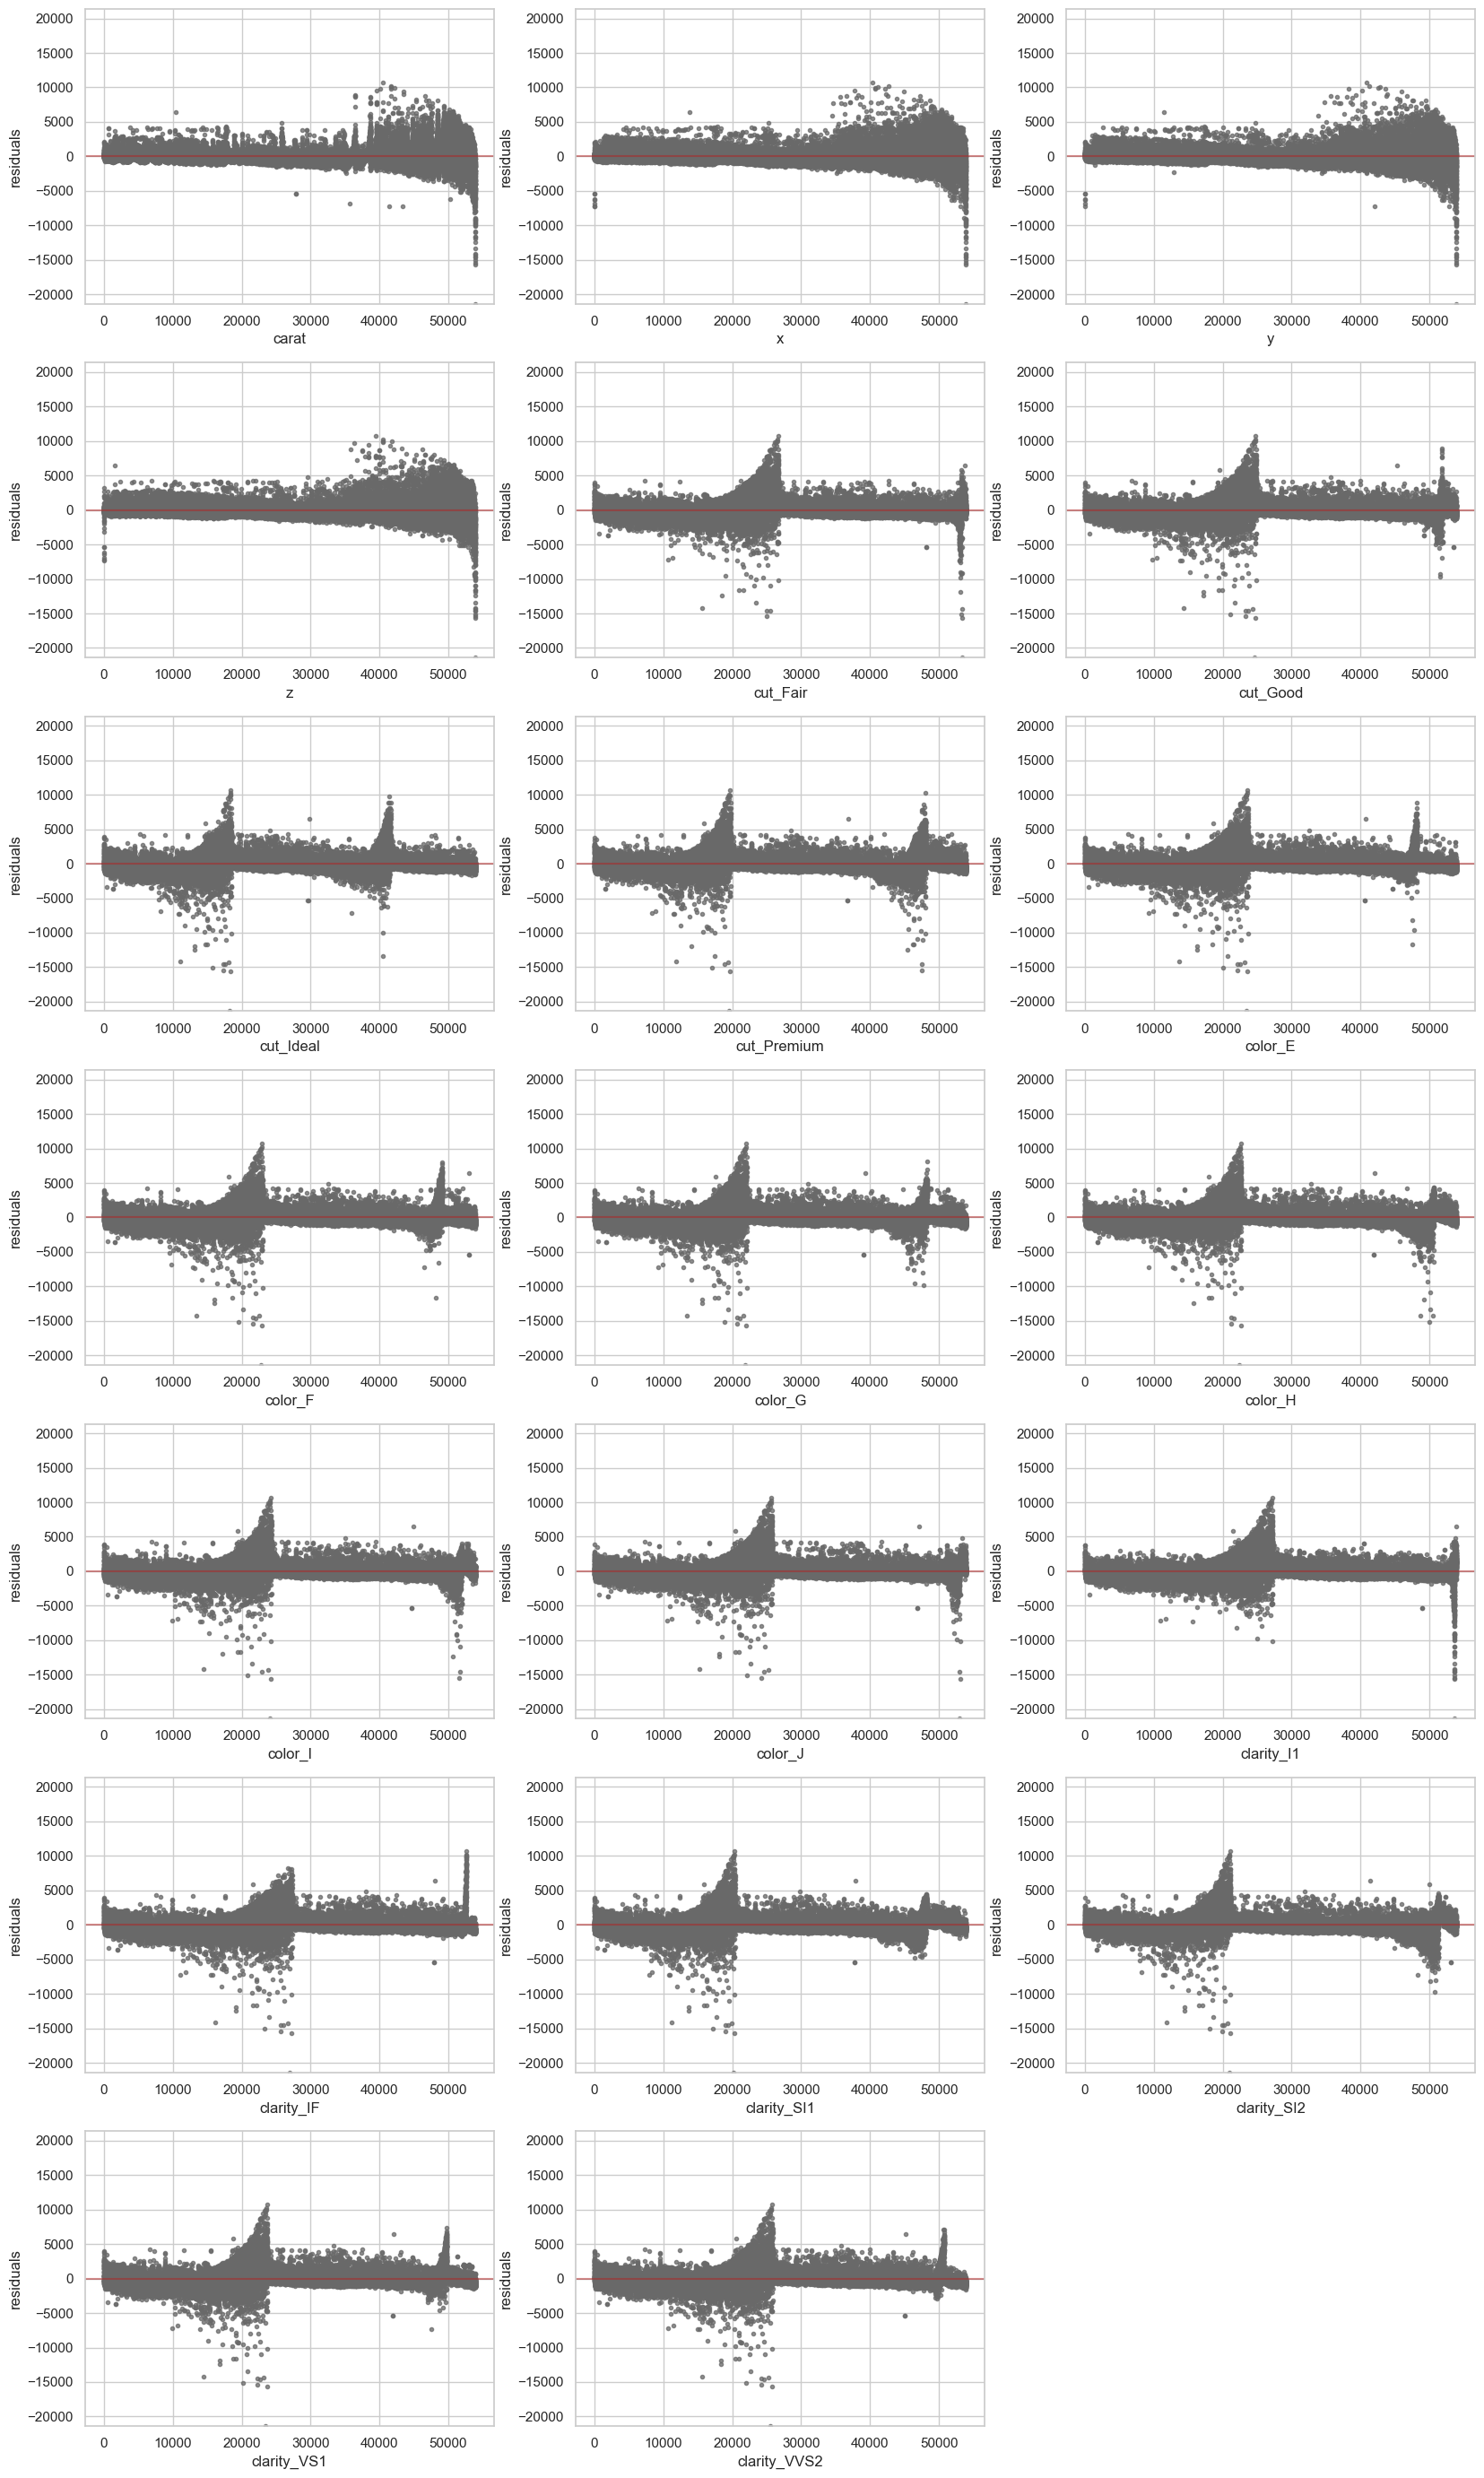

array([1672.36428769,  990.59541111,  115.89289383, ..., -273.54606309,
        164.17078832,   23.29567995])

In [74]:
plot_residuals(result1, ["carat","x","y", "z", "cut_Fair", 
                        "cut_Good", "cut_Ideal", "cut_Premium", 
                        "color_E", "color_F", "color_G", "color_H", 
                        "color_I", "color_J", "clarity_I1", "clarity_IF", 
                        "clarity_SI1", "clarity_SI2", "clarity_VS1", "clarity_VVS2"])

We see the residuals are relatively normally distributed with the carat, x, y, and z having a slight negative trend. On appearance it doesn't look like we can make any adjustments to our model by looking at the residuals. 

## Linear Regression Prediction

Lets see how our linear regression model does. We need a feature vector for our diamond. Our fetures we need to choose carat, x, y, z, and cut, color, and clarity. Lets use a diamond of 1 carat. I expect this to cost around $1,000 to $2,000.

Carat = 1 <br>
x = 5.7 <br>
y = 5.7 <br>
z = 3.5 <br>
carat:x:y:z = 113.715 <br>
carat:x = 5.7 <br>
carat:y = 5.7 <br>
carat:z = 3.5 <br>
cut = Ideal <br>
color = G <br>
clarity = IF <br>

The variables: <br>
carat x + y + z + carat:x:y:z + carat:x + carat:y + carat:z + cut_Fair + cut_Good + cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J + clarity_I1 + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VVS2

In [79]:
diamond1 = [1, 5.7, 5.7, 3.5, 113.715, 5.7, 5.7, 3.5, 0, 0, 1, 0, 0, 0,0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [80]:
prediction = final["model"].predict([diamond1])
print(prediction)

[[2218.27002295]]


Pretty close to what I expected at a predicted price of $2,205.49. The model has a mean error of $1,095.39. Lets see what the error bounds are:

In [81]:
prediction[0][0] - 1.96 * final["sigma"], prediction[0][0] + 1.96 * final["sigma"]

(71.31008145368196, 4365.229964449792)

Our linear regression model predicts charges of $2,205.49 for our diamond with 95% error bounds of $71.31 to $4,365.23. 